In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
dataset = pd.read_csv('diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


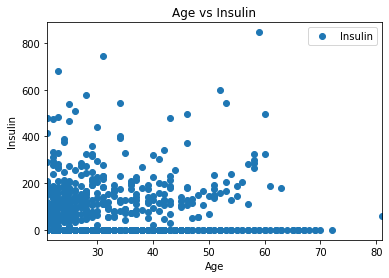

In [3]:
dataset.plot(x='Age',y='Insulin',style='o')
plt.title('Age vs Insulin')
plt.xlabel('Age')
plt.ylabel('Insulin')
plt.show()

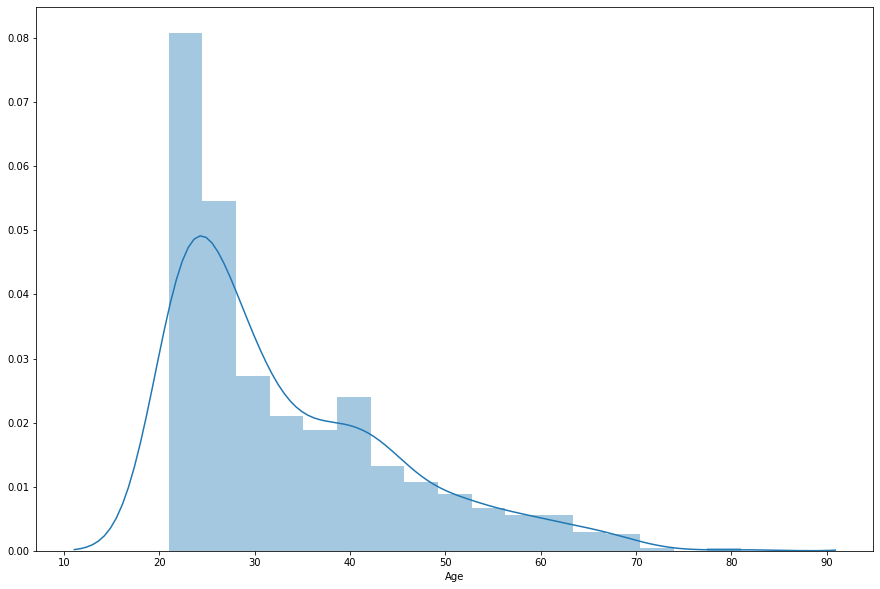

In [4]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['Age'])

In [5]:
X=dataset['Insulin'].values.reshape(-1,1)
y=dataset['Age'].values.reshape(-1,1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [6]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
print(regressor.intercept_)
print(regressor.coef_)

[34.12869943]
[[-0.00650423]]


In [8]:
y_pred=regressor.predict(X_test)

In [9]:
df=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})
df

,Actual,Predicted
0,22,34.128699
1,23,33.478276
2,25,34.128699
3,51,32.990459
4,31,34.128699
...,...,...
149,29,32.886391
150,28,33.809992
151,22,34.128699
152,24,33.445755


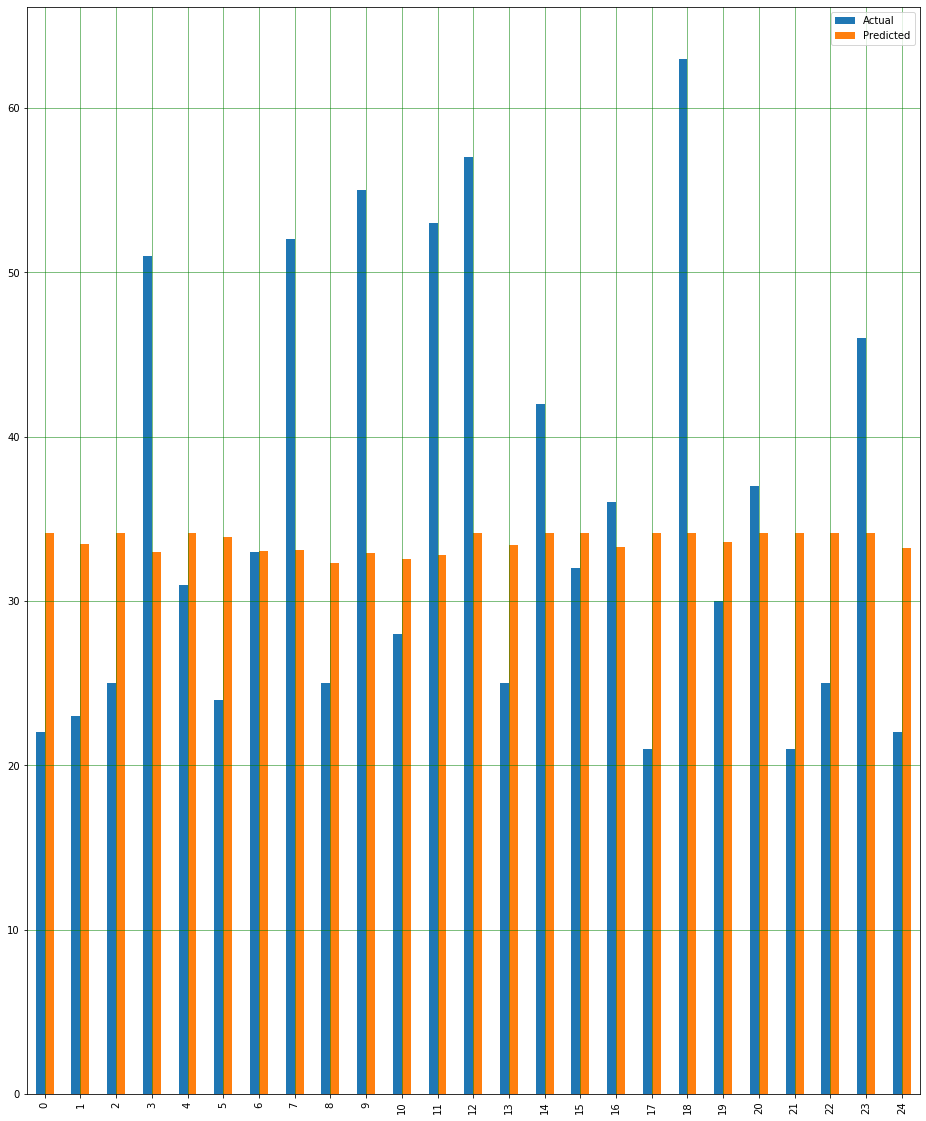

In [10]:
df1=df.head(25)
df1.plot(kind='bar',figsize=(16,20))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

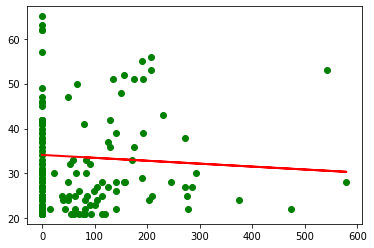

In [11]:
plt.scatter(X_test,y_test,color='green')
plt.plot(X_test,y_pred,color='red',linewidth=2)
plt.show()

In [12]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Square Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 9.136335353807958
Mean Square Error: 116.17953480194689
Root Mean Squared Error: 10.778661085772523


## Multiple Regression

In [13]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [14]:
dataset=pd.read_csv('diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [15]:
dataset.shape

(768, 9)

In [16]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
dataset.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [18]:
x=dataset.iloc[:,:-2].values
y=dataset.iloc[:,-1].values

In [19]:
x_train,x_test,ytrain,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [20]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
y_pred=regressor.predict(x_test)

In [22]:
y_test-y_pred

array([[-34.57314999, -35.57314999, -35.57314999, ..., -34.57314999,
        -35.57314999, -35.57314999],
       [-27.56257224, -28.56257224, -28.56257224, ..., -27.56257224,
        -28.56257224, -28.56257224],
       [-30.75183481, -31.75183481, -31.75183481, ..., -30.75183481,
        -31.75183481, -31.75183481],
       ...,
       [-38.8025783 , -39.8025783 , -39.8025783 , ..., -38.8025783 ,
        -39.8025783 , -39.8025783 ],
       [-31.21059377, -32.21059377, -32.21059377, ..., -31.21059377,
        -32.21059377, -32.21059377],
       [-26.78590809, -27.78590809, -27.78590809, ..., -26.78590809,
        -27.78590809, -27.78590809]])

In [23]:
from sklearn.metrics import mean_squared_error,r2_score
rmse=(np.sqrt(mean_squared_error(y_test,y_pred)))
r2score=r2_score(y_test,y_pred)

In [24]:
print(rmse)
print(r2score)

33.86512094995644
-5407.353474748263


In [25]:
regressor.score(x_test,y_test)


-5407.353474748263

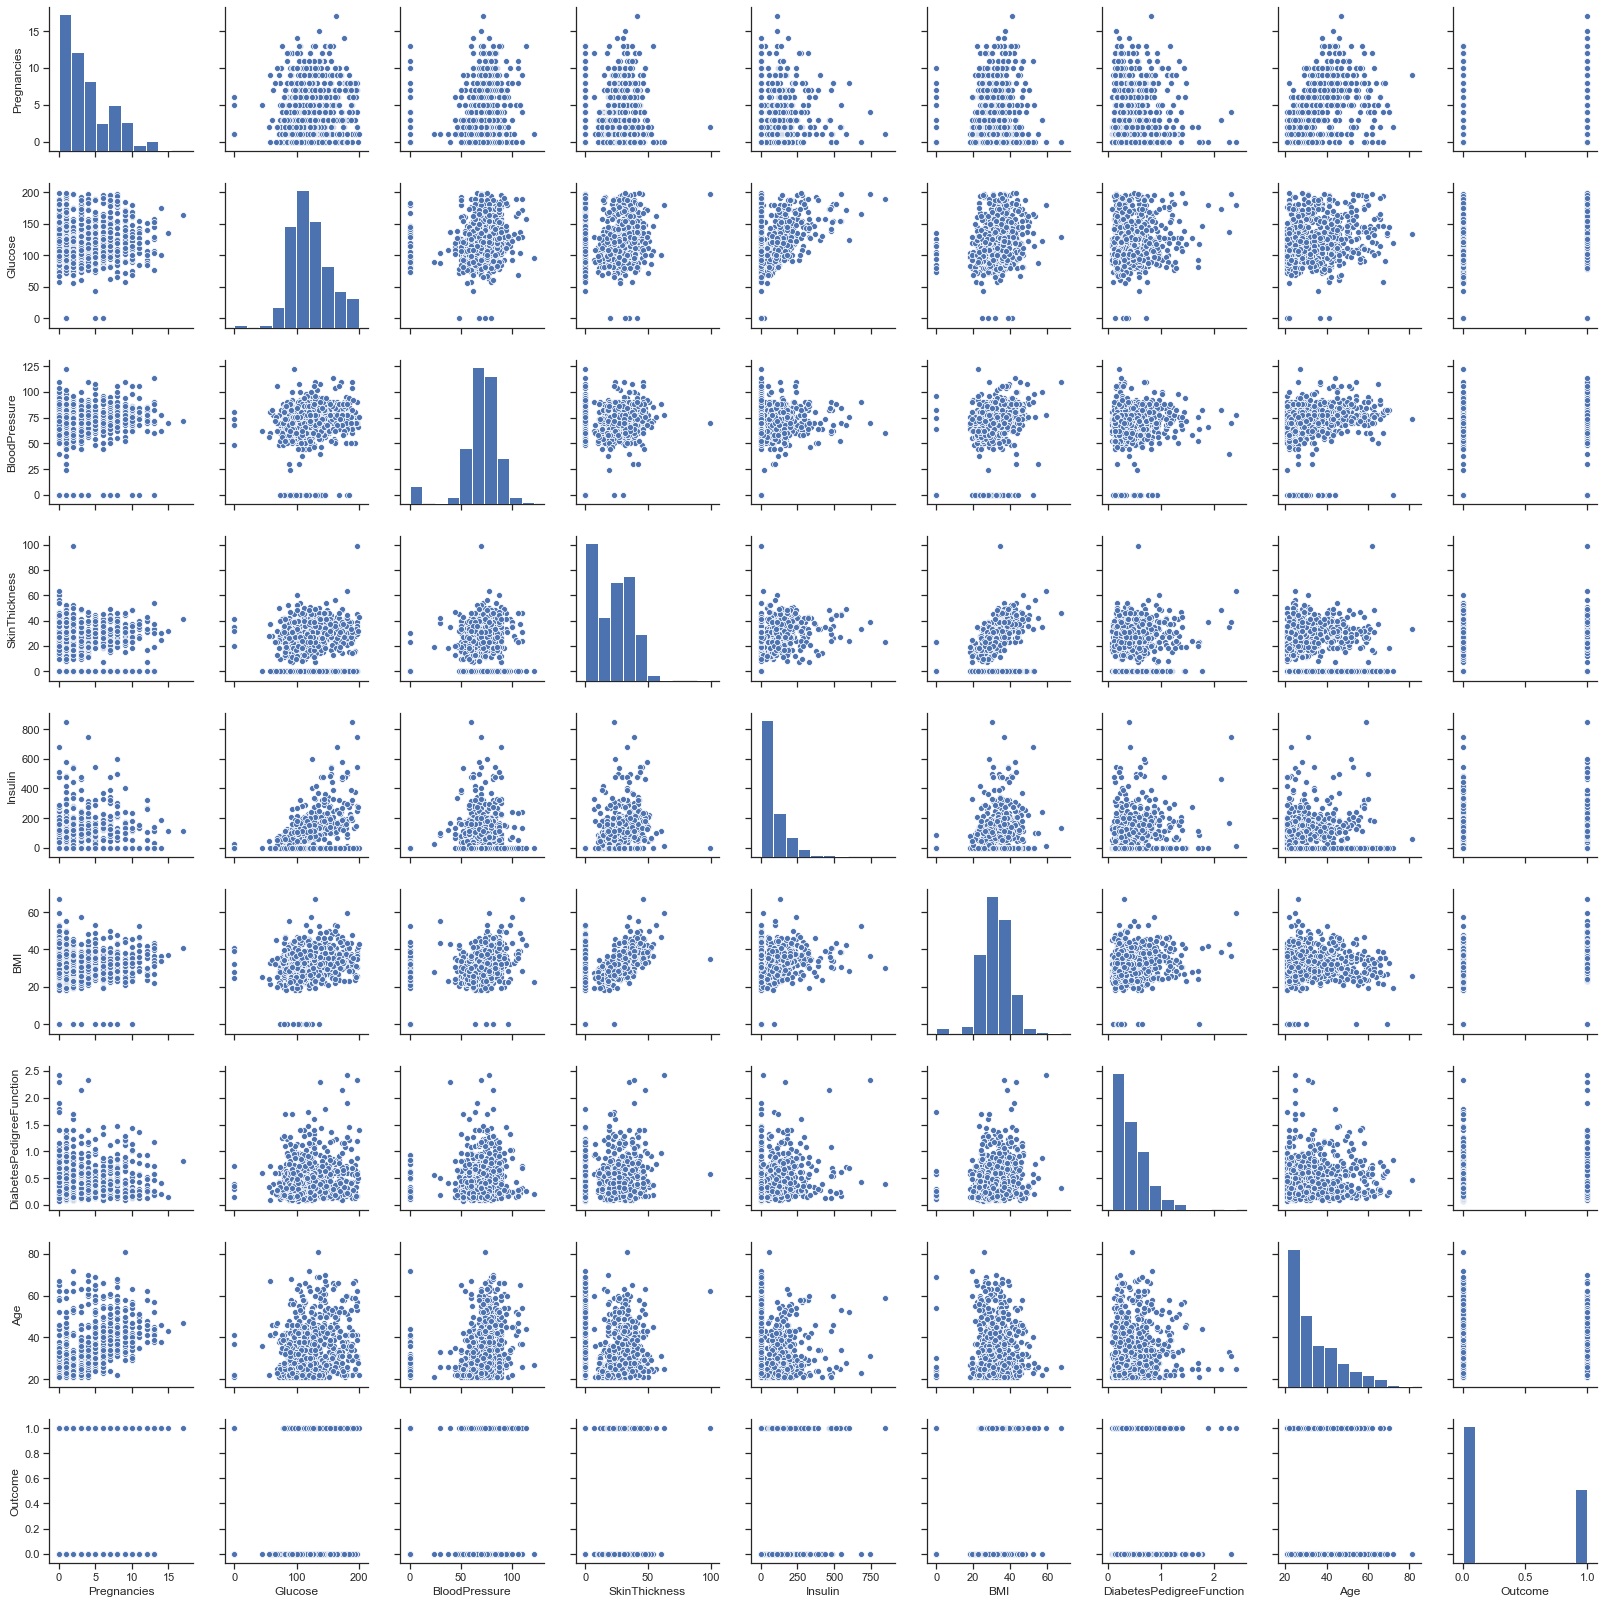

In [26]:
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(dataset)

In [27]:
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [28]:
x1=dataset.iloc[:,[0,2]].values
y1=dataset.iloc[:,-1].values

In [29]:
x1

array([[ 6, 72],
       [ 1, 66],
       [ 8, 64],
       ...,
       [ 5, 72],
       [ 1, 60],
       [ 1, 70]], dtype=int64)

In [30]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=0)


In [31]:
regressor=LinearRegression()
regressor.fit(x1_train,y1_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
y1_pred=regressor.predict(x1_test)

In [36]:
y1_pred

array([0.28902858, 0.31396522, 0.3577754 , 0.39180667, 0.25423943,
       0.28599704, 0.50216361, 0.34951225, 0.30183904, 0.41825907,
       0.3419334 , 0.39483821, 0.39332244, 0.29729173, 0.47116389,
       0.25651309, 0.47116389, 0.26932355, 0.37596466, 0.37816472,
       0.37293312, 0.31851253, 0.25788166, 0.34648071, 0.28144972,
       0.27690241, 0.26257618, 0.61555209, 0.30790213, 0.38877512,
       0.44622725, 0.25348155, 0.27015503, 0.29729173, 0.27235509,
       0.38574358, 0.55961574, 0.32609139, 0.26477624, 0.33283877,
       0.25348155, 0.34344917, 0.40916444, 0.33738608, 0.31093367,
       0.26181829, 0.30487059, 0.33283877, 0.35929117, 0.37141735,
       0.52103716, 0.29729173, 0.57545774, 0.45835342, 0.25651309,
       0.26780778, 0.28144972, 0.4115117 , 0.31093367, 0.46950092,
       0.496932  , 0.36687003, 0.25651309, 0.20497685, 0.34041762,
       0.47267966, 0.50974247, 0.34344917, 0.48245858, 0.50216361,
       0.30638636, 0.3901437 , 0.25651309, 0.43493256, 0.36535

In [38]:
from sklearn.metrics import mean_squared_error,r2_score
rmse=(np.sqrt(mean_squared_error(y1_test,y1_pred)))
r2score=r2_score(y1_test,y1_pred)

In [39]:
print(rmse)
print(r2score)

0.4408610715027006
0.08343491444896933


## Polynomial Regression

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

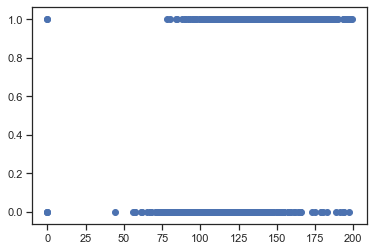

In [43]:
data=pd.read_csv('diabetes.csv')
x=data.iloc[:,1:2].values
y=data.iloc[:,-1].values
plt.scatter(x,y)
plt.show()

In [44]:
regressor=LinearRegression()
regressor.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
y_pred=regressor.predict(x)

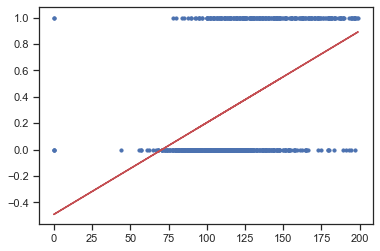

In [46]:
plt.scatter(x,y,s=10)
plt.plot(x,y_pred,color='r')
plt.show()

In [47]:
from sklearn.metrics import r2_score
r2score=r2_score(x,regressor.predict(x))
r2score

-14.2196371071549

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [49]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features=PolynomialFeatures(degree=4)
x_poly=polynomial_features.fit_transform(x_train)

In [50]:
x_poly

array([[1.00000000e+00, 1.50000000e+02, 2.25000000e+04, 3.37500000e+06,
        5.06250000e+08],
       [1.00000000e+00, 9.70000000e+01, 9.40900000e+03, 9.12673000e+05,
        8.85292810e+07],
       [1.00000000e+00, 1.65000000e+02, 2.72250000e+04, 4.49212500e+06,
        7.41200625e+08],
       ...,
       [1.00000000e+00, 9.40000000e+01, 8.83600000e+03, 8.30584000e+05,
        7.80748960e+07],
       [1.00000000e+00, 8.50000000e+01, 7.22500000e+03, 6.14125000e+05,
        5.22006250e+07],
       [1.00000000e+00, 1.36000000e+02, 1.84960000e+04, 2.51545600e+06,
        3.42102016e+08]])

In [52]:
regressor1=LinearRegression()
regressor1.fit(x_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

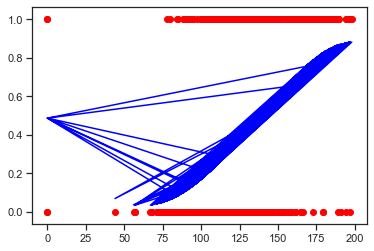

In [53]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,regressor1.predict(polynomial_features.fit_transform(x_train)),color='blue')
plt.show()

In [55]:
y_pred=regressor1.predict(polynomial_features.fit_transform(x_test))


In [57]:
from sklearn.metrics import r2_score
r2score=r2_score(y_test,y_pred)
r2score

0.24208616944034822

In [58]:
from sklearn.metrics import r2_score
r2score=r2_score(y_test,regressor.predict(x_test))
r2score

0.2404238517168319

## Logistic Regression

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [60]:
data=pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


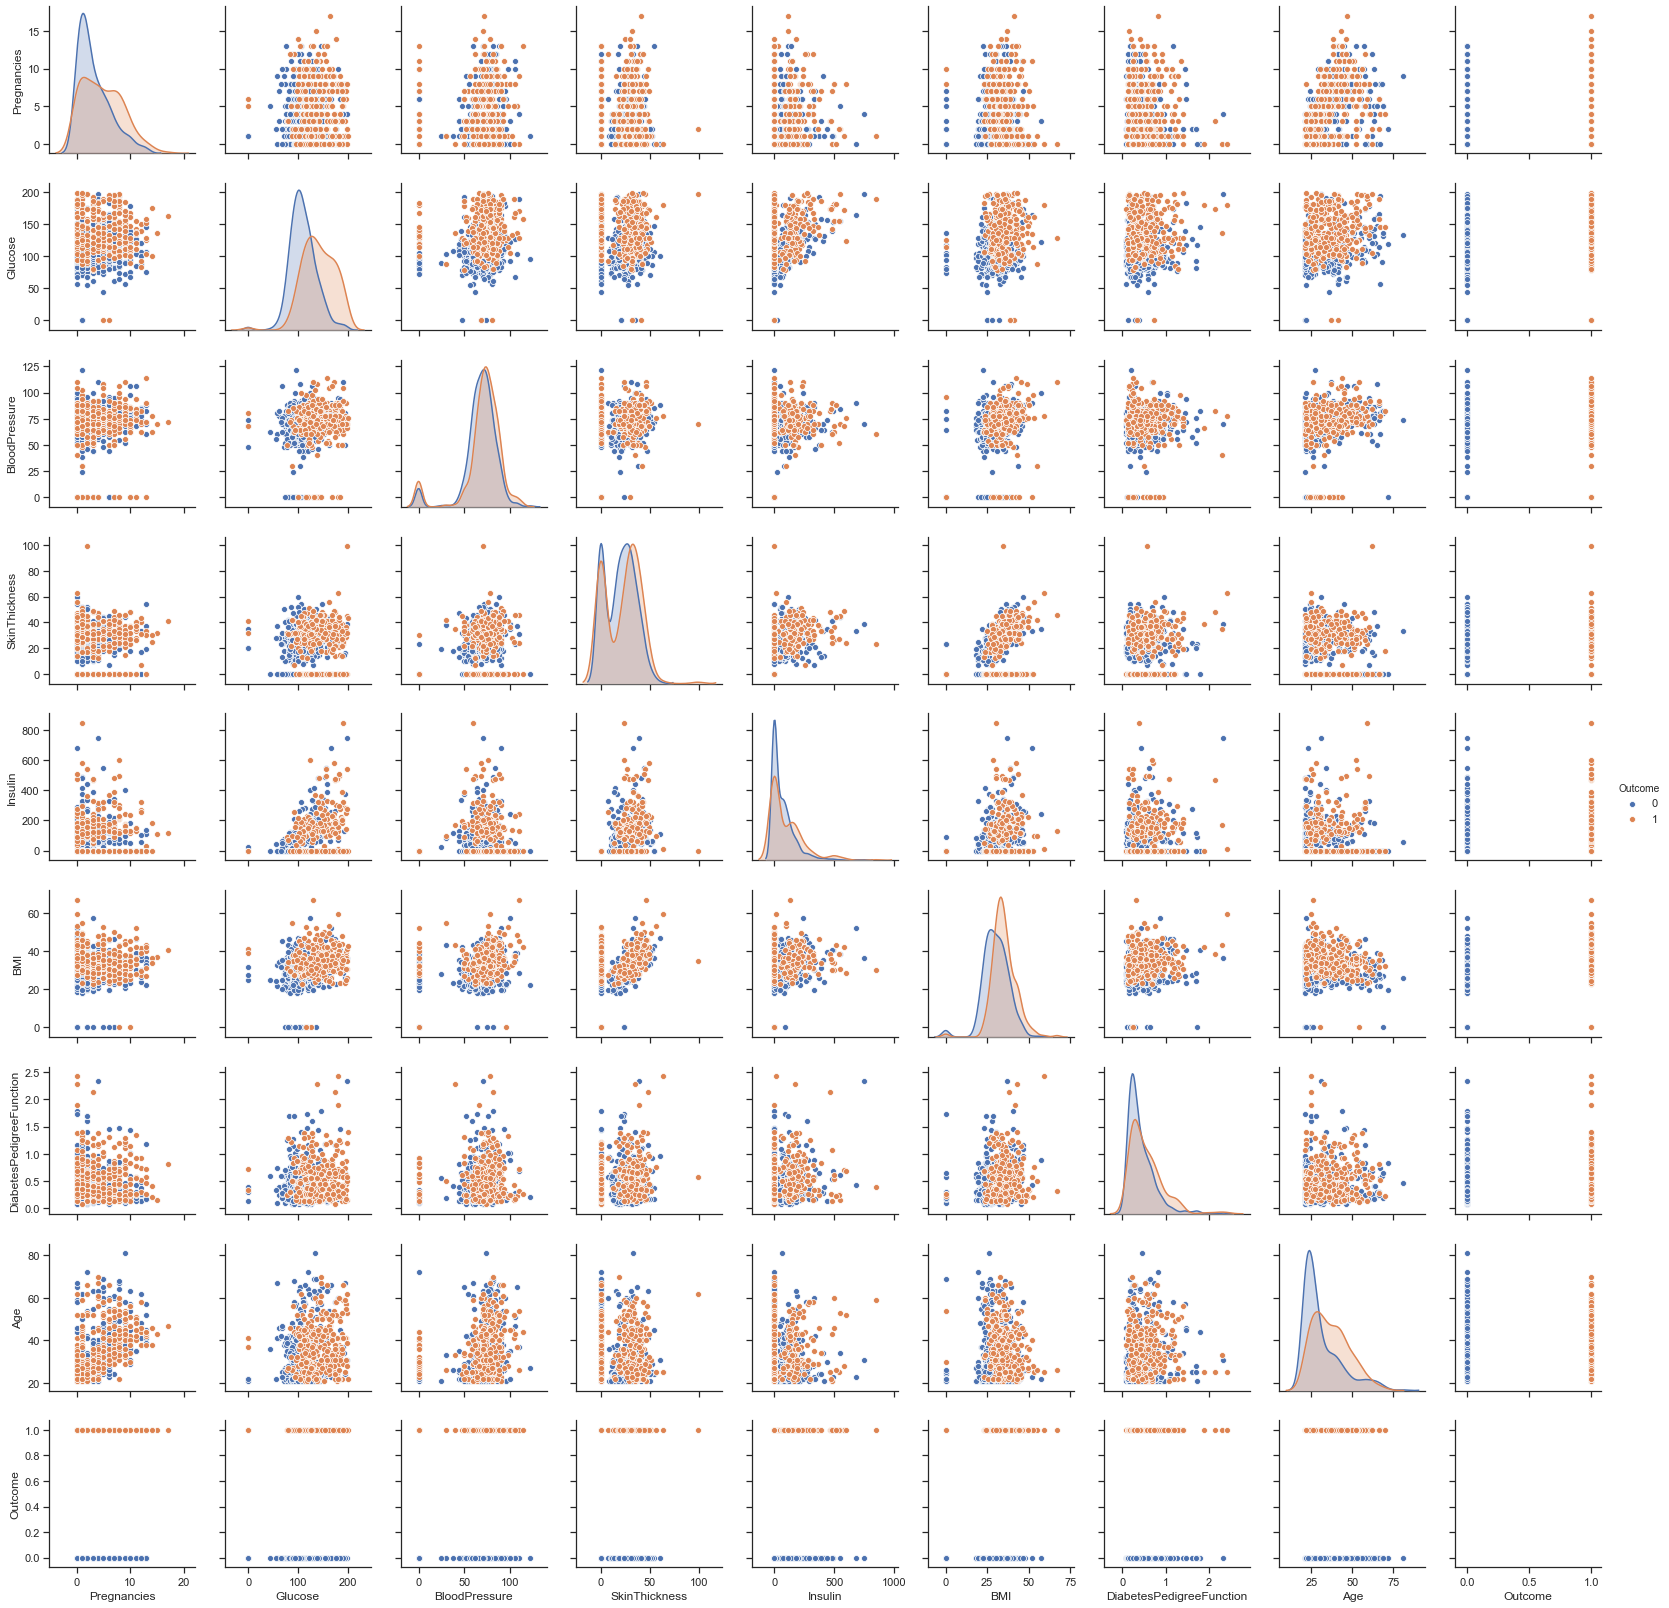

In [64]:
sns.pairplot(data,hue='Outcome')

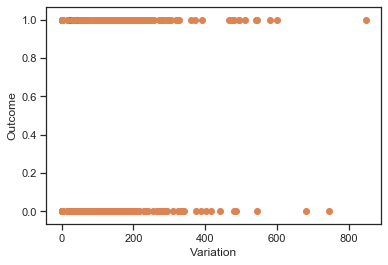

In [65]:
plt.scatter(data.Age,data.Outcome)
plt.scatter(data.Insulin,data.Outcome)
plt.xlabel('Variation')
plt.ylabel('Outcome')
plt.show()

In [66]:
def sigmoid(z):
    return 1.0/(1+np.exp(-z))


In [ ]:
np.arrange